In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt

In [26]:
csv = pd.read_csv('Shelfside Games Reviewed - Review Data.csv')
# data = csv.drop(['Published', 'Vid Link'])


In [23]:
# relevant_metrics = ['Game', 'score', 'dan score', 'ash score', 'video length']
relevant_metrics = ['Game', 'dan score', 'ash score']
data = csv[relevant_metrics]

In [24]:
# Drop rows where critical columns ('score', 'dan score', 'ash score') have missing values
data_cleaned = data.dropna(subset=relevant_metrics)

# Now, 'data_cleaned' will have no missing values in these columns
data_cleaned

,Game,dan score,ash score
0,Dominion,4.0,7.0
1,The Resistance,5.0,6.0
2,Incan Gold,8.0,8.0
3,Splendor,7.0,6.0
4,Dixit,8.0,4.0
...,...,...,...
116,Bohnanza,6.0,7.0
120,Twilight Inscription,3.0,6.0
139,Acquire,6.0,7.0
140,Earth,6.0,6.0


Text(0, 0.5, 'ash score')

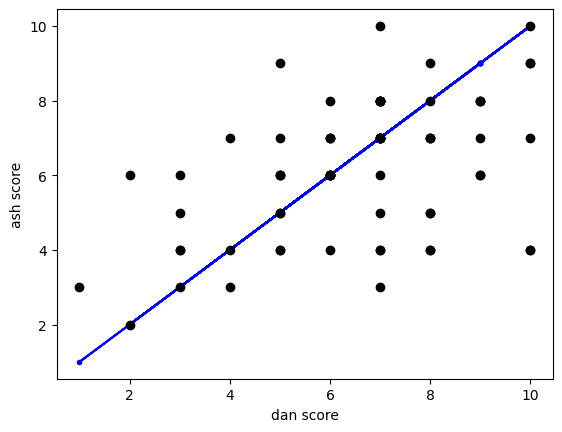

In [42]:
xx = data_cleaned['dan score']
yy = data_cleaned['ash score']


plt.figure()
plt.plot(xx, xx, 'b.-')
plt.plot(xx, yy, 'k.', markersize = 12)
plt.xlabel('dan score')
plt.ylabel('ash score')


In [10]:

# Standardize the 'dan score', 'ash score', and 'score' columns
scaler = StandardScaler()
data_cleaned[['dan score', 'ash score']] = scaler.fit_transform(data_cleaned[['dan score', 'ash score']])

# Create feature vectors for each game
game_features = data_cleaned[['dan score', 'ash score']].values

# Calculate cosine similarity between games
similarity_matrix = cosine_similarity(game_features)

# Add similarity data back to the DataFrame for reference
data_cleaned['similarity'] = similarity_matrix.tolist()
data_cleaned


/tmp/ipykernel_72115/1855996821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[['dan score', 'ash score']] = scaler.fit_transform(data_cleaned[['dan score', 'ash score']])
/tmp/ipykernel_72115/1855996821.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['similarity'] = similarity_matrix.tolist()


,Game,dan score,ash score,similarity
0,Dominion,-1.188937,0.455186,"[0.9999999999999998, 0.8790672126878016, -0.24..."
1,The Resistance,-0.713362,-0.094176,"[0.8790672126878016, 1.0, -0.6807255539431399,..."
2,Incan Gold,0.713362,1.004547,"[-0.24920396931724306, -0.6807255539431399, 1...."
3,Splendor,0.237787,-0.094176,"[-0.9999342999918017, -0.8735451676505306, 0.2..."
4,Dixit,0.713362,-1.192900,"[-0.7861707757809335, -0.3964932446320647, -0...."
...,...,...,...,...
116,Bohnanza,-0.237787,0.455186,"[0.7493233825769734, 0.3430342784369984, 0.454..."
120,Twilight Inscription,-1.664511,-0.094176,"[0.9122082590618683, 0.997208278466373, -0.624..."
139,Acquire,-0.237787,0.455186,"[0.7493233825769734, 0.3430342784369984, 0.454..."
140,Earth,-0.237787,-0.094176,"[0.7366217269599313, 0.9699331368611954, -0.83..."


In [19]:
data_cleaned.T

,0,1,2,3,4,5,7,8,9,10,...,104,105,107,111,113,116,120,139,140,144
Game,Dominion,The Resistance,Incan Gold,Splendor,Dixit,Coup,SanGuoSha,Suburbia,Cash N Guns,Monikers,...,Mammothodus,Tainted Grail: Kings of Ruin,Horizons of Spirit Island,Rising Sun,Re;Act,Bohnanza,Twilight Inscription,Acquire,Earth,Bloodstones
dan score,-1.188937,-0.713362,0.713362,0.237787,0.713362,-0.713362,-0.713362,1.188937,0.713362,-1.664511,...,-0.237787,0.237787,-0.713362,0.237787,0.237787,-0.237787,-1.664511,-0.237787,-0.237787,-0.713362
ash score,0.455186,-0.094176,1.004547,-0.094176,-1.1929,-0.094176,1.553909,1.004547,-0.643538,-1.1929,...,-0.094176,0.455186,-0.643538,-1.742262,0.455186,0.455186,-0.094176,0.455186,-0.094176,-1.1929
similarity,"[0.9999999999999998, 0.8790672126878016, -0.24...","[0.8790672126878016, 1.0, -0.6807255539431399,...","[-0.24920396931724306, -0.6807255539431399, 1....","[-0.9999342999918017, -0.8735451676505306, 0.2...","[-0.7861707757809335, -0.3964932446320647, -0....","[0.8790672126878016, 1.0, -0.6807255539431399,...","[0.7145715616182597, 0.2946765655302816, 0.499...","[-0.4826056613009062, -0.8417527847294686, 0.9...","[-0.9329229874649416, -0.6484545743704102, -0....","[0.5508113262495122, 0.8820663986859917, -0.94...",...,"[0.7366217269599313, 0.9699331368611954, -0.83...","[-0.11550950728119387, -0.5750476289347258, 0....","[0.45393375461927143, 0.8237929522388319, -0.9...","[-0.48054825150324726, -0.0043853188994105235,...","[-0.11550950728119387, -0.5750476289347258, 0....","[0.7493233825769734, 0.3430342784369984, 0.454...","[0.9122082590618683, 0.997208278466373, -0.624...","[0.7493233825769734, 0.3430342784369984, 0.454...","[0.7366217269599313, 0.9699331368611954, -0.83...","[0.17245008945579773, 0.6211513000235002, -0.9..."


In [15]:
from sklearn.decomposition import TruncatedSVD

# # Create a matrix of Dan and Ash's scores
rating_matrix = data_cleaned.pivot(index='Game', columns=['dan score', 'ash score']).fillna(0)

# rating_matrix.columns = ['_'.join(col).strip() for col in rating_matrix.columns.values]

# # Perform matrix factorization
svd = TruncatedSVD(n_components=2)
# decomposed_matrix = svd.fit_transform(rating_matrix)

# # Reconstruct the matrix to get predicted scores
# predicted_scores = np.dot(decomposed_matrix, svd.components_)
rating_matrix


similarity  \
dan score                      -1.188937   
ash score                       0.455186   
Game                                       
Acquire                                0   
All Time Wrestling                     0   
Archer Love Letter                     0   
Bears vs. Babies                       0   
Betrayal at House on the Hill          0   
...                                  ...   
The Resistance                         0   
Throw Throw Burrito                    0   
Twilight Inscription                   0   
Unfathomable                           0   
Wingspan                               0   

                                                                                  \
dan score                                                              -0.713362   
ash score                                                              -0.094176   
Game                                                                               
Acquire                                                                        0   
All Time Wrestling                                                             0   
Archer Love Letter                                                             0   
Bears vs. Babies                                                               0   
Betrayal at House on the Hill                                                  0   
...                                                                          ...   
The Resistance                 [0.8790672126878016, 1.0, -0.6807255539431399,...   
Throw Throw Burrito                                                            0   
Twilight Inscription                                                           0   
Unfathomable                   [0.8790672126878016, 1.0, -0.6807255539431399,...   
Wingspan                                                                       0   

                                                                       \
dan score                      0.713362  0.237787  0.713362 -0.713362   
ash score                      1.004547 -0.094176 -1.192900  1.553909   
Game                                                                    
Acquire                               0         0         0         0   
All Time Wrestling                    0         0         0         0   
Archer Love Letter                    0         0         0         0   
Bears vs. Babies                      0         0         0         0   
Betrayal at House on the Hill         0         0         0         0   
...                                 ...       ...       ...       ...   
The Resistance                        0         0         0         0   
Throw Throw Burrito                   0         0         0         0   
Twilight Inscription                  0         0         0         0   
Unfathomable                          0         0         0         0   
Wingspan                              0         0         0         0   

                                                                       ...  \
dan score                      1.188937  0.713362 -1.664511  0.237787  ...   
ash score                      1.004547 -0.643538 -1.192900  0.455186  ...   
Game                                                                   ...   
Acquire                               0         0         0         0  ...   
All Time Wrestling                    0         0         0         0  ...   
Archer Love Letter                    0         0         0         0  ...   
Bears vs. Babies                      0         0         0         0  ...   
Betrayal at House on the Hill         0         0         0         0  ...   
...                                 ...       ...       ...       ...  ...   
The Resistance                        0         0         0         0  ...   
Throw Throw Burrito                   0         0         0         0  ...   
Twilight Inscription                  0         0         0         0  ...  

In [14]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X_dense = np.random.rand(100, 100)
X_dense[:, 2 * np.arange(50)] = 0
X = csr_matrix(X_dense)
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd.fit(X)
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())
print(svd.singular_values_)

[0.01570766 0.05122679 0.04998062 0.04795064 0.04539933]
0.21026503465070345
[35.24105443  4.5981613   4.54200434  4.44866153  4.32887456]
